In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
 

#### 1.  **Visualizing the distribution of residuals (errors) using seaborn 'diamonds' dataset for `multiple linear regression model.`**


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = sns.load_dataset('diamonds')

# Numeric features for regression >> 
features = ['carat', 'depth', 'table', 'x', 'y', 'z']  # Predictor variables
target = 'price'  # Target variable

data = data.dropna()

# Splitting into features (X) and target (y)
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

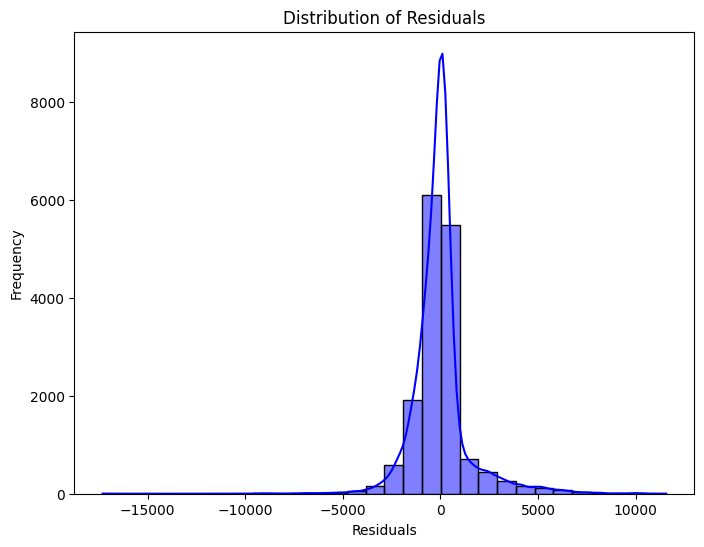

In [55]:
y_pred = model.predict(X_test)

residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### 2. **Write a Python script to calculate and print Mean Squared Error `(MSE)`, Mean Absolute Error `(MAE)`, and Root Mean Squared Error `(RMSE)` for a linear regression model.**

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Assuming the model is already trained, and we have y_test and y_pred from Qsn 1

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 2189040.81
Mean Absolute Error (MAE): 885.27
Root Mean Squared Error (RMSE): 1479.54


#### 3. **Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and a correlation matrix for multicollinearity.**

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = sns.load_dataset('diamonds')

# numeric features for regression
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
target = 'price'

data = data.dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

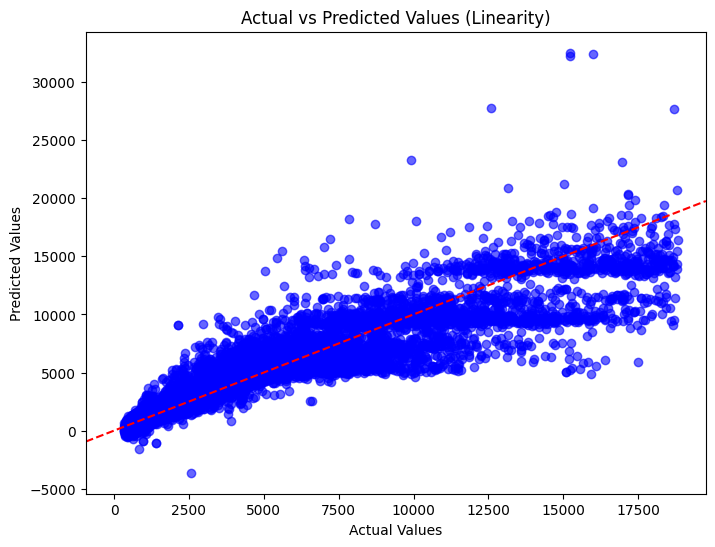

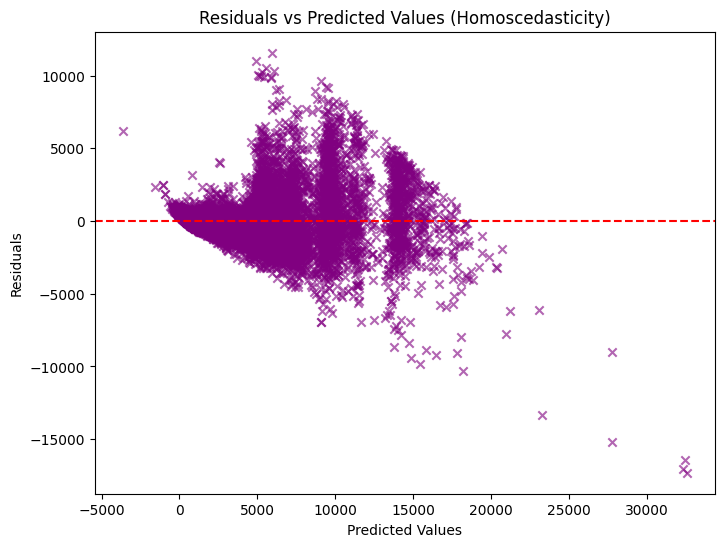

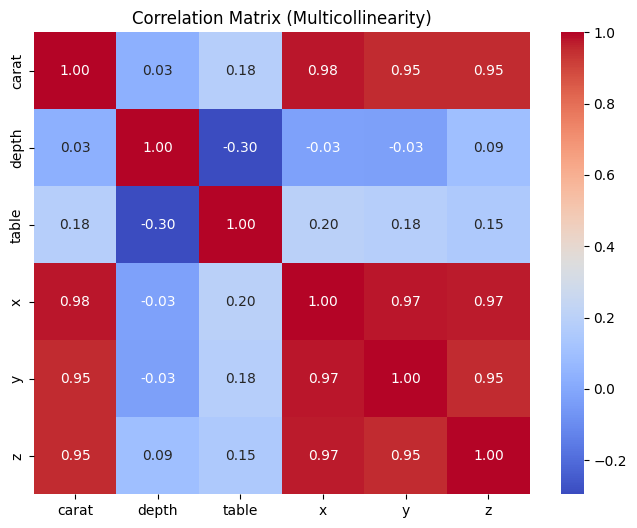

In [58]:
# Predict on the test set
y_pred = model.predict(X_test)

# 1. Linearity:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.title('Actual vs Predicted Values (Linearity)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.axline([0, 0], slope=1, color='red', linestyle='--')  # Reference line
plt.show()

# 2. Homoscedasticity:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', marker='x')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Homoscedasticity)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Multicollinearity:
correlation_matrix = data[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Multicollinearity)')
plt.show()


#### 4. **Write a python script that creates a `Machine Learning pipeline` with `feature scaling` and evaluates the performance of different regression models.**

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

def generate_dataset():
    np.random.seed(42)
    X = np.random.rand(500, 5)  # 500 samples, 5 features
    y = X[:, 0] * 10 + X[:, 1] * 5 - X[:, 2] * 3 + np.random.normal(0, 1, 500)
    return pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(5)]), pd.Series(y, name="Target")

# dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Function to evaluate models
def evaluate_models(X, y, models):
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", model)
        ])

        # Perform cross-validation
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="neg_mean_squared_error")
        mean_mse = -np.mean(cv_scores)

        # Fit the model and calculate metrics
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            "Mean Cross-Validation MSE": mean_mse,
            "Test MSE": mse,
            "Test R2 Score": r2
        }

    return results

# Main script
if __name__ == "__main__":
   
    X, y = generate_dataset()

    # Evaluate models
    evaluation_results = evaluate_models(X, y, models)


    print("Model Evaluation Results:\n")
    for model_name, metrics in evaluation_results.items():
        print(f"{model_name}:\n")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.4f}")
        print("\n")


Model Evaluation Results:

Linear Regression:

  Mean Cross-Validation MSE: 0.9134
  Test MSE: 0.8724
  Test R2 Score: 0.9200


Random Forest:

  Mean Cross-Validation MSE: 1.2220
  Test MSE: 1.2521
  Test R2 Score: 0.8851


Support Vector Regressor:

  Mean Cross-Validation MSE: 1.3484
  Test MSE: 1.4302
  Test R2 Score: 0.8688




#### 5. **Implement a simple linear regression model on a dataset and print the model's `coefficients, intercept, and R-squared score.`**

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Fit a simple linear regression model
simple_X = data[["carat"]]
simple_y = data["price"]
simple_X_train, simple_X_test, simple_y_train, simple_y_test = train_test_split(simple_X, simple_y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(simple_X_train, simple_y_train)


LinearRegression()

In [61]:
print(f"Coefficient: {simple_model.coef_[0]}")
print(f"Intercept: {simple_model.intercept_}")
print(f"R-squared score: {simple_model.score(simple_X_test, simple_y_test)}")

Coefficient: 7768.910490360937
Intercept: -2261.9117456493095
R-squared score: 0.8489390686155807


#### 6. **Write a Python script that analyzes the relationship between total bill and tip in the `'tips' dataset` using simple linear regression and visualizes the results.**

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
X = df[["total_bill"]]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

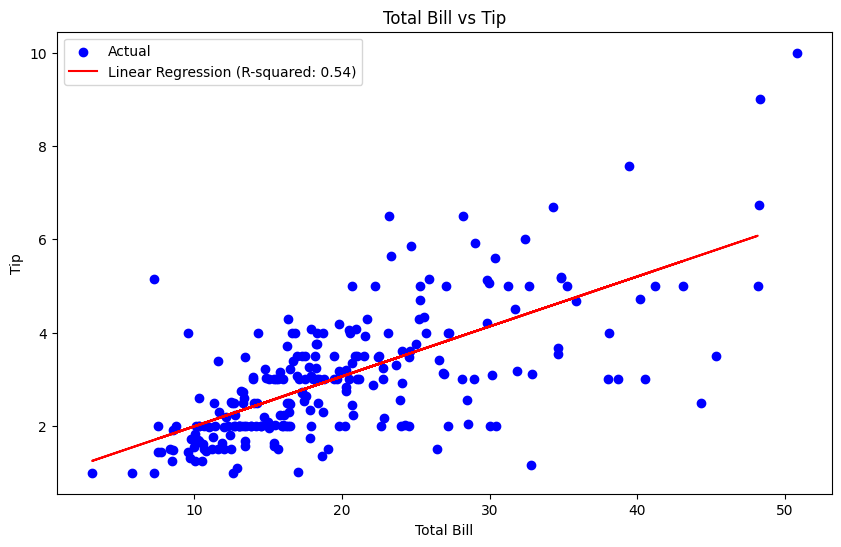

In [64]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(x='total_bill', y='tip', data=df,  color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label=f'Linear Regression (R-squared: {r2:.2f})')
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.show()

#### 7. **Write a python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.**

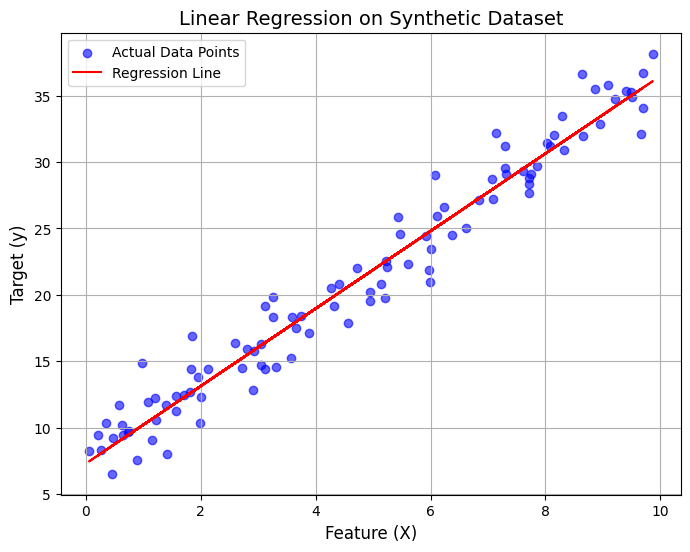

Model Coefficient (slope): 2.92
Model Intercept: 7.29


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Synthetic dataset >>
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # Linear relation with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data Points', alpha=0.6)
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression on Synthetic Dataset', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


print(f"Model Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}")


#### 8. **Write a python script that `pickles a trained linear regression model(degree 2)` to a dataset and plots the regression curve.**

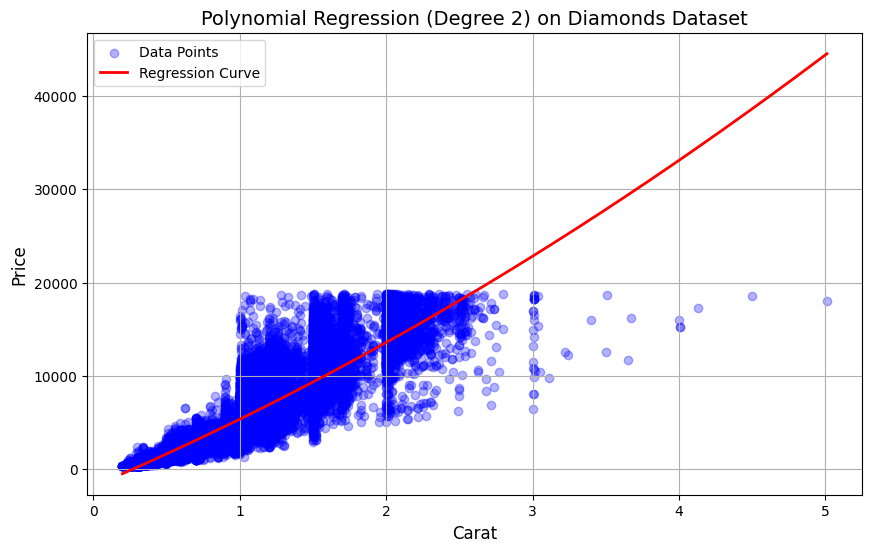

Model Coefficients: [   0.         6675.81606974  514.80993036]
Model Intercept: -1832.7337588847658


In [66]:
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


data = sns.load_dataset('diamonds')

# 'carat' as the feature and 'price' as the target
X = data['carat'].values.reshape(-1, 1)
y = data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline for polynomial regression (degree 2)
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

# Saving (pickle) the trained model >>
with open('polynomial_regression_model_diamonds.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# Loading  the pickled model >>
with open('polynomial_regression_model_diamonds.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predicting values using the loaded model >>
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = loaded_model.predict(X_plot)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.3)
plt.plot(X_plot, y_plot, color='red', label='Regression Curve', linewidth=2)
plt.title('Polynomial Regression (Degree 2) on Diamonds Dataset', fontsize=14)
plt.xlabel('Carat', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


model = pipeline.named_steps['linear_regression']
coefficients = model.coef_
intercept = model.intercept_
print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")


#### 9. **Write a python script that fits a `polynomial regression model` (degree 2) to a dataset and plots the regressive curve.**

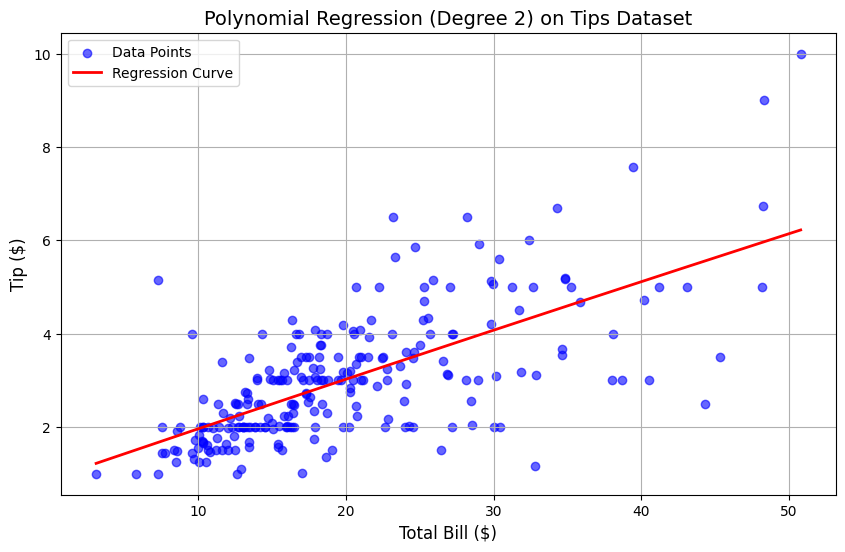

Model Coefficients: [ 0.00000000e+00  1.07855549e-01 -5.71031271e-05]
Model Intercept: 0.8911169610891809


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

data = sns.load_dataset('tips')

#'total_bill' as the feature and 'tip' as the target
X = data['total_bill'].values.reshape(-1, 1)
y = data['tip'].values

# pipeline for polynomial regression (degree 2)
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X, y)

X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_plot = pipeline.predict(X_plot)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X_plot, y_plot, color='red', label='Regression Curve', linewidth=2)
plt.title('Polynomial Regression (Degree 2) on Tips Dataset', fontsize=14)
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


model = pipeline.named_steps['linear_regression']
coefficients = model.coef_
intercept = model.intercept_

print(f"Model Coefficients: {coefficients}")
print(f"Model Intercept: {intercept}")


#### 10. **Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.**

In [68]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 5 * X + 8 + np.random.rand(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [69]:
print(f"Model Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Model Intercept: {model.intercept_[0]:.2f}") 

Model Coefficient (slope): 4.99
Model Intercept: 9.03


#### 11. **Write a python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.**

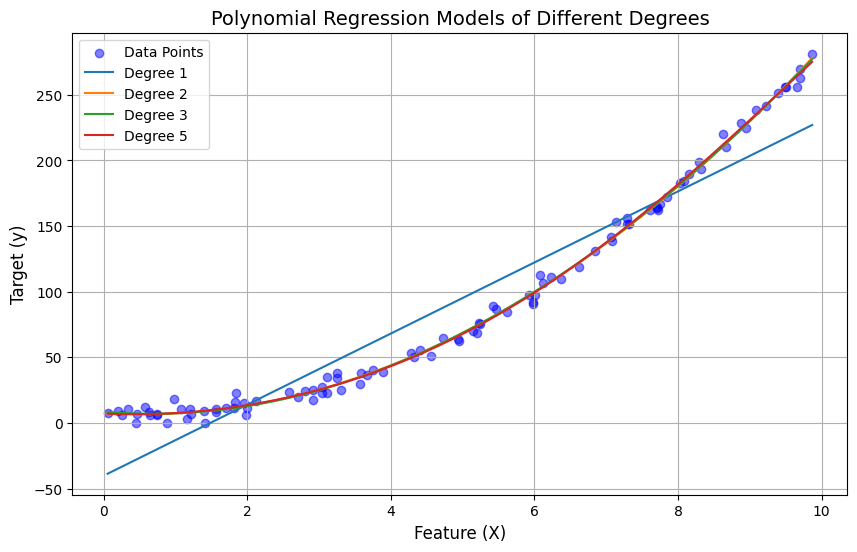

Performance Comparison:
Degree 1: Train MSE = 568.01, Test MSE = 472.61
Degree 2: Train MSE = 20.37, Test MSE = 15.90
Degree 3: Train MSE = 20.19, Test MSE = 16.05
Degree 5: Train MSE = 19.65, Test MSE = 17.15


In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X**2 - 2 * X + 5 + np.random.randn(100, 1)* 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 5] #DEGREES TO TEST
performance = {} #dict to store performance

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.5)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    # Evaluating the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    performance[degree] = {'Train MSE': train_mse, 'Test MSE': test_mse}
    
    # the regression curve plot >>
    X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))
    plt.plot(X_plot, y_plot, label=f'Degree {degree}')
    

plt.title('Polynomial Regression Models of Different Degrees', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


print("Performance Comparison:")
for degree, metrics in performance.items():
    print(f"Degree {degree}: Train MSE = {metrics['Train MSE']:.2f}, Test MSE = {metrics['Test MSE']:.2f}")

#### 12. **Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.**

Model Coefficients: [[2.95000442 2.15743475]]
Model Intercept: [4.58651498]
R-squared Score: 0.98


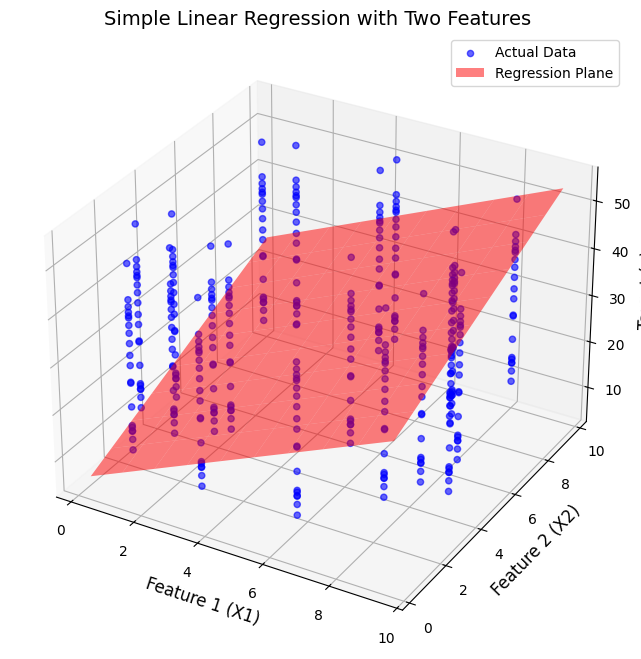

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X1 = np.random.rand(100, 1) * 10  # Feature 1
X2 = np.random.rand(100, 1) * 10  # Feature 2
y = 3 * X1 + 2 * X2 + 5 + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Combine features into a single array
X = np.hstack((X1, X2))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the model's coefficients, intercept, and R-squared score
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print(f"R-squared Score: {r2:.2f}")

# Plot the data points and regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Data', alpha=0.6)

# Generate a grid for the regression plane
X1_grid, X2_grid = np.meshgrid(
    np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 10),
    np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 10),
)
X_grid = np.c_[X1_grid.ravel(), X2_grid.ravel()]
y_grid = model.predict(X_grid).reshape(X1_grid.shape)

# Plot the regression plane
ax.plot_surface(X1_grid, X2_grid, y_grid, color='red', alpha=0.5, label='Regression Plane')

# Set labels and title
ax.set_title("Simple Linear Regression with Two Features", fontsize=14)
ax.set_xlabel("Feature 1 (X1)", fontsize=12)
ax.set_ylabel("Feature 2 (X2)", fontsize=12)
ax.set_zlabel("Target (y)", fontsize=12)
ax.legend()
plt.show()


#### **`insights` >> `R-squared` value is close to 1, the model fits data well.**

#### 13. **Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.**

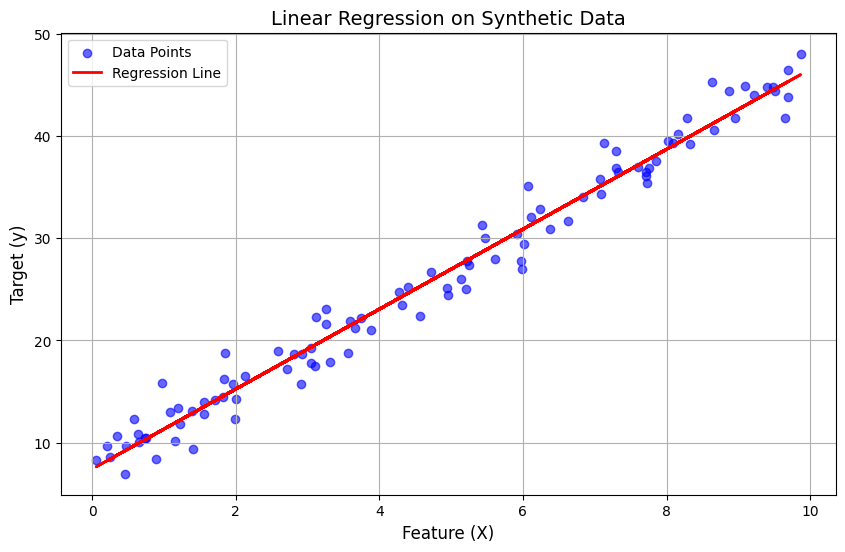

Coefficient (slope): 3.91
Intercept: 7.43


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 4 * X + 7 + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression on Synthetic Data', fontsize=14)
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Print model parameters
print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


#### 14. **Write a Python script that uses the `Variance Inflation Factor (VIF)` to check for multicollinearity in a dataset with multiple features.**

In [73]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression


np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, effective_rank=3)  # Effective rank introduces collinearity
feature_names = [f'Feature_{i+1}' for i in range(X.shape[1])]
data = pd.DataFrame(X, columns=feature_names)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]


print("Variance Inflation Factor (VIF):")
print(vif_data)

# Interpretation
print("\nInterpretation:")
print("VIF > 10: High multicollinearity (consider removing the feature).")
print("VIF between 5-10: Moderate multicollinearity (monitor or transform data).")
print("VIF < 5: Low multicollinearity (acceptable).")


Variance Inflation Factor (VIF):
     Feature       VIF
0  Feature_1  1.132905
1  Feature_2  1.277123
2  Feature_3  1.116568
3  Feature_4  1.023889
4  Feature_5  1.219292

Interpretation:
VIF > 10: High multicollinearity (consider removing the feature).
VIF between 5-10: Moderate multicollinearity (monitor or transform data).
VIF < 5: Low multicollinearity (acceptable).


#### 15. **Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.**

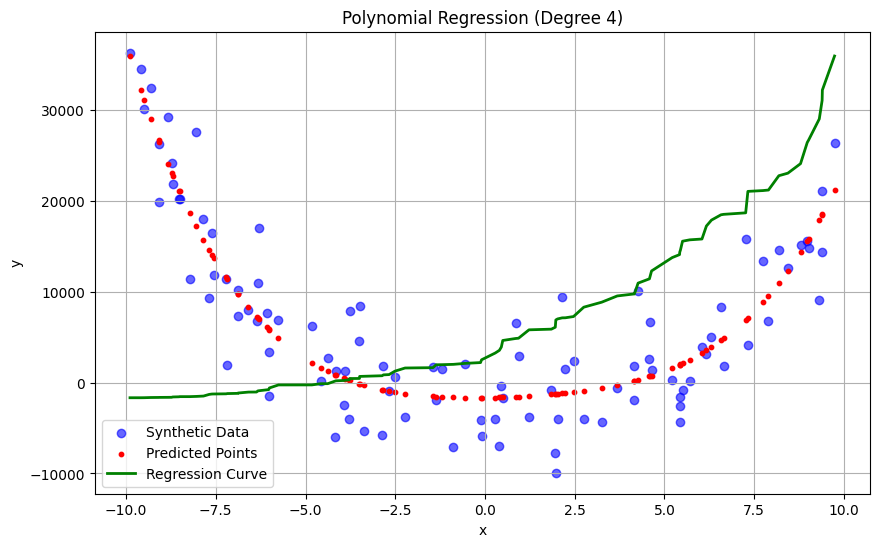

Coefficients: [ 0.         49.67064938 85.70711829 -7.47505358  2.35465256]
Intercept: -1659.9634854922206
RMSE: 4369.04


In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)
x = np.random.uniform(-10, 10, 100)
y = 3 * x**4 - 5 * x**3 + 2 * x**2 - x + np.random.normal(0, 5000, 100)  # Polynomial with noise

# Reshape x for sklearn compatibility
x = x.reshape(-1, 1)

# polynomial features
degree = 4
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Synthetic Data')
plt.scatter(x, y_pred, color='red', s=10, label='Predicted Points')
plt.plot(np.sort(x, axis=0), np.sort(y_pred, axis=0), color='green', linewidth=2, label='Regression Curve')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")


#### 16. **Write a Python script that creates a` machine learning pipeline `with `data standardization` and a `multiple linear regression model`, and prints the R-squared score.**

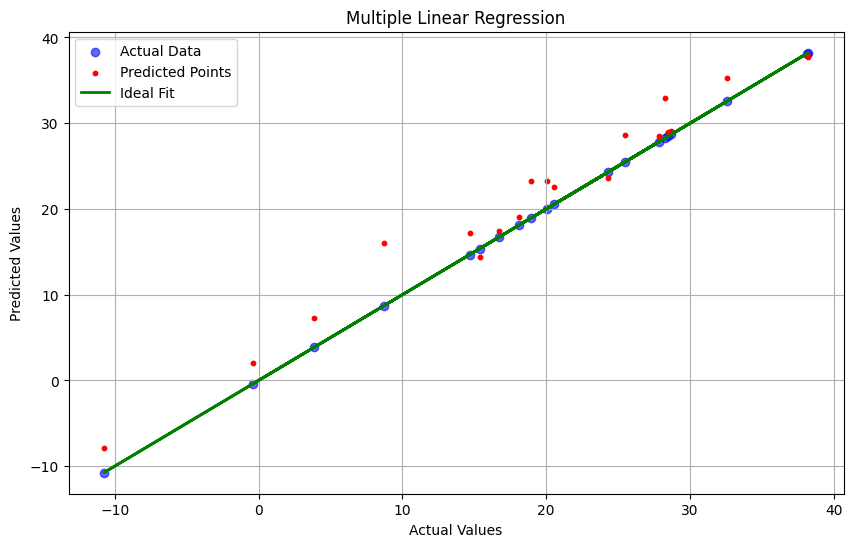

R-squared score on test data: 0.9454
Model coefficients: [ 7.14302126 -5.33846245  9.64459623]
Intercept: 19.06597191608504


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


np.random.seed(42)
n_samples = 100
n_features = 3

X = np.random.rand(n_samples, n_features) * 10  # Random data for predictors
coefficients = [2.5, -1.7, 3.2]  # True coefficients for the relationship
noise = np.random.normal(0, 2, n_samples)  # Add Gaussian noise
y = np.dot(X, coefficients) + noise  # Linear relationship with noise


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Multiple linear regression model
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label='Actual Data')
plt.scatter(y_test, y_pred, color='red', s=10, label='Predicted Points')
plt.plot(y_test, y_test, color='green', linewidth=2, label='Ideal Fit')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



print(f"R-squared score on test data: {r2:.4f}")
print(f"Model coefficients: {pipeline.named_steps['regressor'].coef_}")
print(f"Intercept: {pipeline.named_steps['regressor'].intercept_}")


#### 17. **Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.**

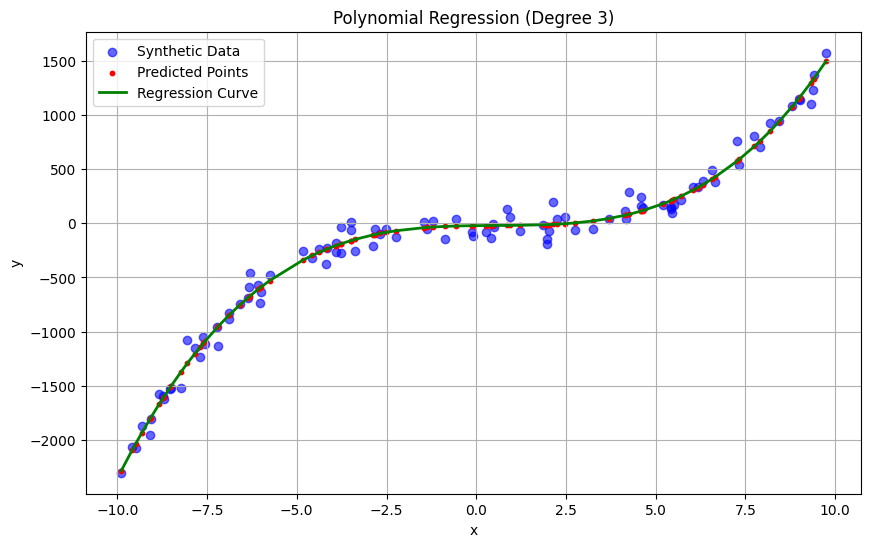

Model Coefficients: [ 0.          3.77106499 -3.43261256  1.95401995]
Model Intercept: -21.562158267834008


In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
x = np.random.uniform(-10, 10, 100)  # Random values for x
y = 2 * x**3 - 4 * x**2 + 3 * x + np.random.normal(0, 100, 100)  # Cubic relationship with noise

# Reshape x for sklearn compatibility
x = x.reshape(-1, 1)

# polynomial features (degree 3)
degree = 3
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)

y_pred = model.predict(x_poly)


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Synthetic Data')
plt.scatter(x, y_pred, color='red', s=10, label='Predicted Points')
plt.plot(np.sort(x, axis=0), np.sort(y_pred, axis=0), color='green', linewidth=2, label='Regression Curve')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


#### 18. **Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


np.random.seed(42)
n_samples = 100
n_features = 5

X = np.random.rand(n_samples, n_features) * 10  # Features range from 0 to 10

# true coefficients for the relationship
true_coefficients = [2.5, -1.7, 3.2, 0.8, -2.0]
noise = np.random.normal(0, 2, n_samples)  # Add Gaussian noise

# Generate target values with a linear combination of features
y = np.dot(X, true_coefficients) + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


print("R-squared Score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared Score: 0.9661546097551097
Model Coefficients: [ 2.43059173 -1.74678467  3.32958066  0.82911692 -2.08912803]
Model Intercept: 0.29196948797398115


#### 19. **Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.**

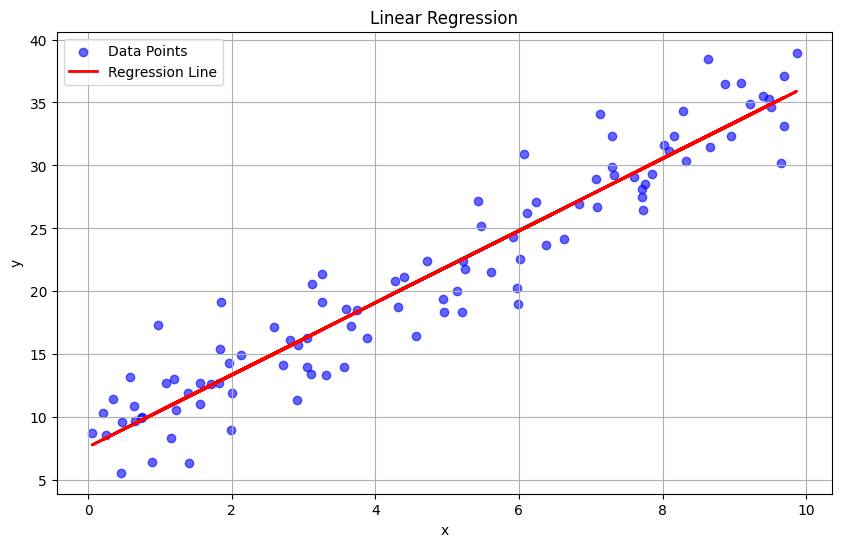

Slope (Coefficient): 2.86
Intercept: 7.65
Mean Squared Error: 7.26


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


np.random.seed(42)
x = np.random.uniform(0, 10, 100)  # Generate 100 random x values between 0 and 10
y = 3 * x + 7 + np.random.normal(0, 3, 100)  # Linear relationship (y = 3x + 7) with noise


x = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


print(f"Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.2f}")


#### 20. **Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


np.random.seed(42)
n_samples = 100
n_features = 3

X = np.random.rand(n_samples, n_features) * 10  # Features range from 0 to 10

true_coefficients = [4.5, -2.1, 3.7]  # Coefficients for the features
noise = np.random.normal(0, 1.5, n_samples)  # Add Gaussian noise

y = np.dot(X, true_coefficients) + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


print("R-squared Score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared Score: 0.9839090636324229
Model Coefficients: [ 4.51588465 -2.1113091   3.80290889]
Model Intercept: -0.12751566244935475


#### 21. **Write a Python script that demonstrates how to `serialize and deserialize` machine learning models `using joblib instead of pickling.`**

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib


np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Single feature
y = 3 * X.squeeze() + 7 + np.random.normal(0, 2, 100)  # Linear relationship with noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Serialize the model using joblib
joblib.dump(model, 'linear_regression_model.joblib')
print("Model has been serialized and saved as 'linear_regression_model.joblib'.")

#Deserialize the model
loaded_model = joblib.load('linear_regression_model.joblib')
print("Model has been deserialized and loaded.")

y_pred = loaded_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared Score of the loaded model:", r2)

print("Loaded Model Coefficients:", loaded_model.coef_)
print("Loaded Model Intercept:", loaded_model.intercept_)


Model has been serialized and saved as 'linear_regression_model.joblib'.
Model has been deserialized and loaded.
R-squared Score of the loaded model: 0.9686345415489115
Loaded Model Coefficients: [2.91972946]
Loaded Model Intercept: 7.285826638917127


#### 22. **Write a Python script to perform linear regression with categorical features `using one-hot encoding.` Use the `Seaborn 'tips' dataset.`**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


tips = sns.load_dataset('tips')

# features (X) and target (y)
# Select numerical and categorical features
categorical_features = ['sex', 'smoker', 'day', 'time']
numerical_features = ['total_bill', 'size']

# Target variable
y = tips['tip']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False) #drop='first' to avoid multicollinearity.
categorical_encoded = encoder.fit_transform(tips[categorical_features])

# Combine numerical and encoded categorical features
X = pd.concat(
    [pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features)), 
    tips[numerical_features].reset_index(drop=True)], 
    axis=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)
print("Model Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=True))


R-squared Score: 0.4373018194348254
Model Coefficients:
      Feature  Coefficient
1  smoker_Yes    -0.192353
2     day_Sat    -0.185785
4    day_Thur    -0.179721
3     day_Sun    -0.050793
0    sex_Male     0.028819
6  total_bill     0.094700
5  time_Lunch     0.094957
7        size     0.233484


#### 23. **Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.**

In [82]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Training Ridge Regression model with a regularization strength of 1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)


print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("\nLinear Regression R-squared:", r2_linear)
print("Ridge Regression R-squared:", r2_ridge)


Linear Regression Coefficients: [60.58692801 98.649735   64.55680389 57.06246717 35.61331699]
Ridge Regression Coefficients: [59.87954432 97.15091098 63.24364738 56.31999433 35.34591136]

Linear Regression R-squared: 0.9999994350808352
Ridge Regression R-squared: 0.9997951390892165


#### 24. **Write a Python script that uses `cross-validation` to evaluate a Linear Regression model on a synthetic dataset.**

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

model = LinearRegression()


cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # R-squared as evaluation metric


print("Cross-validation R-squared scores for each fold: ", cv_scores)
print("Mean R-squared score: ", np.mean(cv_scores))
print("Standard deviation of R-squared scores: ", np.std(cv_scores))


Cross-validation R-squared scores for each fold:  [0.99999931 0.99999901 0.99999977 0.99999917 0.99999934]
Mean R-squared score:  0.9999993197756156
Standard deviation of R-squared scores:  2.542218324267291e-07


#### 25. **Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.**

Degree 1 Polynomial Regression R-squared: 0.9374


Degree 2 Polynomial Regression R-squared: 0.9367
Degree 3 Polynomial Regression R-squared: 0.9366


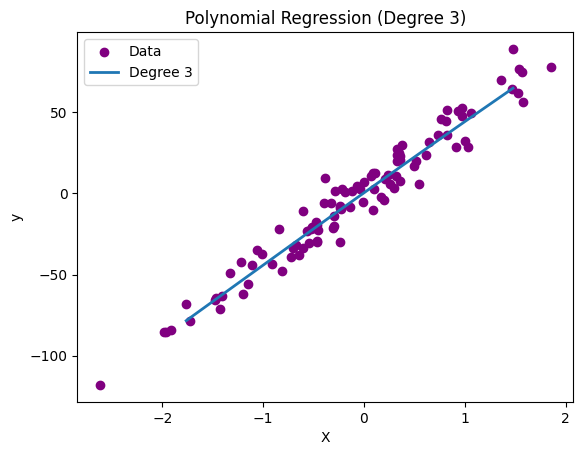

Degree 4 Polynomial Regression R-squared: 0.9371
Degree 5 Polynomial Regression R-squared: 0.9373


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression


X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop for different polynomial degrees and fit models
degrees = [1, 2, 3, 4, 5]
for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_pred = model.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)
    
    
    print(f"Degree {degree} Polynomial Regression R-squared: {r2:.4f}")


    if degree == 3:  # Plot only for degree 3 
        plt.scatter(X, y, color='purple', label='Data')
        plt.plot(np.sort(X_test, axis=0), model.predict(poly.transform(np.sort(X_test, axis=0))), label=f'Degree {degree}', linewidth=2)
        plt.legend()
        plt.title('Polynomial Regression (Degree 3)')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()
